# Building Machine Learning Models to Predict Financial Wellness Scores

## Faith Nyaboke Orucho
 faith.orucho@strathmore.edu
 192745

### Background of the Project
Financial well-being is the ability of a person to manage their financial obligations, and any financial emergencies that may arise in the future. It is the rate at which people feel secure about their financial decisions, both in the present and in the future. When one is not financially secure, they get financial stress, which affects their mental health and overall well-being. According to the American Psychological Association (2015), financial stress has been the top cause of unhealthy behaviors such as smoking, drug use, alcohol use, and weight gain. In some cases, financial stress can lead to unhealthy patterns like gambling and excessive borrowing, which eventually cause bad debt. This affects an individual's relationships, performance at work, ability to sleep, and family life, among others (Human Resources University of Michigan, 2024). Statistics show that before the pandemic, about 9 million people borrowed money for basic things like food and bills, 11.5 million people had less than 100 pounds in their savings accounts, and about 22 million people did not have a retirement plan. The FinAccess Household Survey of 2021 in Kenya showed that Kenyan adults, at the household level, had a low-income level, a diminishing savings rate, and high debt insolvency levels (KIPPRA, 2023).


### Research problem
Every person deserves the freedom to make financial decisions that positively impact their life, without having to worry about financial constraints. As the world economy changes, there have been increased cases of mental health problems related to financial stress (Hassan et al., 2021). In Kenya, only about 15-17% of the population is financially healthy (KIPPRA, 2023). This makes most of the population financially vulnerable, and unable to meet both their short-term and long-term financial obligations. The population that is at risk of falling into financial stress should be identified and helped with the use of adequate resources and policy formulations. These will help bridge the gap between the affected population and financial wellness. The aim is to identify individuals with poor financial well-being and apply the potential strategies and policies, thus improving their financial health, their mental health, and overall quality of life. 

###                                            Objectives
1.	To identify the at-risk population using the regression models.
2.	Give policy suggestions and regulations to be implemented to help individuals who are at risk of financial stress.
3.	To identify and analyze the key factors contributing to financial wellness.
4.	By the end of the project, we should publish a comprehensive report, including data analysis and modeling on the findings and recommendations for improving the financial wellbeing of the population.

### Hypothesis
Null hypothesis: There is no significant relationship between income, savings, debt levels, and financial management habits with financial well-being scores.
    
Absolute hypothesis: There is a significant relationship between income, savings, debt levels, and financial management habits with financial well-being scores.

### Data description
The data was obtained from the United States official data website and can be accessed using this link: https://catalog.data.gov/dataset/financial-well-being-in-america-2017. Data was collected using a survey method in 2017. Data was collected using online surveys. The survey was done on older Americans, 18 years and above in the 50 states in the United States. The data was collected by researchers from the Office of research for the CFPB Offices of Financial Education and Financial Protection for Older Americans as a foundation for both internal and external research (Data.gov., 2022). Data was collected with the aim to improve the financial literacy of individuals in America. The data was published in 2020 by the Consumer Financial Protection Bureau. The dataset is public and has no license, therefore free for any public use. The dataset has different variables such as financial skills, financial knowledge, financial attitudes, financial behavior, and many other financial experiences, among other factors that affect financial wellness. 

### Variables list

In [12]:
import pandas as pd

# Create a dictionary with the variable names, labels, and sources
variables_data = {
    "Variable Name": [
        "PUF_ID", "sample", "fpl", "SWB_1", "SWB_2", "SWB_3", "FWBscore", "FWB1_1", "FWB1_2", 
        "FWB1_3", "FWB1_4", "FWB1_5", "FWB1_6", "FWB2_1", "FWB2_2", "FWB2_3", "FWB2_4", "FSscore",
        "FS1_1", "FS1_2", "PPT18OV", "PCTLT200FPL", "finalwt"
    ],
    "Variable Label": [
        "Public Use File ID", "Sample Frame", "Poverty status", "I am satisfied with my life",
        "I am optimistic about my future", "If I work hard today, I will be more successful in the future",
        "Well-being scale score", "I could handle a major unexpected expense", "I am securing my financial future",
        "Because of my money situation...I will never have the things I want in life",
        "I can enjoy life because of the way I'm managing my money", "I am just getting by financially",
        "I am concerned that the money I have or will save won't last", 
        "Giving a gift...would put a strain on my finances for the month", 
        "I have money left over at the end of the month", "I am behind with my finances", "My finances control my life",
        "Financial skill scale score", "I know how to get myself to follow through on my financial intentions",
        "I know where to find the advice I need to make decisions involving money",
        "Presence of Household Members - Adults 18+", 
        "County pct less than 200% of poverty level (ACS 2015 5-year SF)", "Final weight"
    ],
    "Variable Source": [
        "ID variable", "Data", "Panel data", "Survey item", "Survey item", "Survey item", "IRT score",
        "Survey item", "Survey item", "Survey item", "Survey item", "Survey item", "Survey item",
        "Survey item", "Survey item", "Survey item", "Survey item", "IRT score", "Survey item",
        "Survey item", "Panel data (modified)", "Merged (modified)", "Weight"
    ]
}

# Convert the dictionary to a pandas DataFrame for better display
variables_df = pd.DataFrame(variables_data)

# Display the DataFrame
print(variables_df)


   Variable Name                                     Variable Label  \
0         PUF_ID                                 Public Use File ID   
1         sample                                       Sample Frame   
2            fpl                                     Poverty status   
3          SWB_1                        I am satisfied with my life   
4          SWB_2                    I am optimistic about my future   
5          SWB_3  If I work hard today, I will be more successfu...   
6       FWBscore                             Well-being scale score   
7         FWB1_1          I could handle a major unexpected expense   
8         FWB1_2                  I am securing my financial future   
9         FWB1_3  Because of my money situation...I will never h...   
10        FWB1_4  I can enjoy life because of the way I'm managi...   
11        FWB1_5                   I am just getting by financially   
12        FWB1_6  I am concerned that the money I have or will s...   
13    

### Machine learning flow

## Step 1: Importing Libraries

In [10]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Step 2: Load the dataset

In [12]:
#load dataset 
fw = pd.read_csv('NFWBS_PUF_2016_data.csv')

#read the first 5 elements in the dataset
fw.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


### Step 3: Explore the dataset

In [14]:
#check the shape of the dataset
fw.shape

(6394, 217)

The dataset has 6394 rows and 217 columns

In [16]:
#get the column names of the dataset
fw.columns

Index(['PUF_ID', 'sample', 'fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FWBscore',
       'FWB1_1', 'FWB1_2', 'FWB1_3',
       ...
       'PPMSACAT', 'PPREG4', 'PPREG9', 'PPT01', 'PPT25', 'PPT612', 'PPT1317',
       'PPT18OV', 'PCTLT200FPL', 'finalwt'],
      dtype='object', length=217)

In [17]:
#check the data types in the columns
fw.columns.dtype

dtype('O')

In [18]:
fw.dtypes

PUF_ID           int64
sample           int64
fpl              int64
SWB_1            int64
SWB_2            int64
                ...   
PPT612           int64
PPT1317          int64
PPT18OV          int64
PCTLT200FPL      int64
finalwt        float64
Length: 217, dtype: object

In [19]:
#check the number of specific data types in the columns
fw.dtypes.value_counts()

int64      215
float64      2
Name: count, dtype: int64

215 columns have integer values while 2 columns have float data types.

In [21]:
#get information about the dataset
fw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Columns: 217 entries, PUF_ID to finalwt
dtypes: float64(2), int64(215)
memory usage: 10.6 MB


In [22]:
# description of the integer data
fw.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,...,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,1967.854493,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,...,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,7123.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,9235.250000,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600582
50%,10901.500000,1.000000,3.000000,6.000000,6.000000,6.000000,56.000000,3.000000,3.000000,2.000000,...,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.845213
75%,12570.750000,1.000000,3.000000,6.000000,7.000000,7.000000,65.000000,4.000000,4.000000,3.000000,...,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.251415
max,14400.000000,3.000000,3.000000,7.000000,7.000000,7.000000,95.000000,5.000000,5.000000,5.000000,...,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.638674


The target variable (FWBScore) has a mean of 56.034094

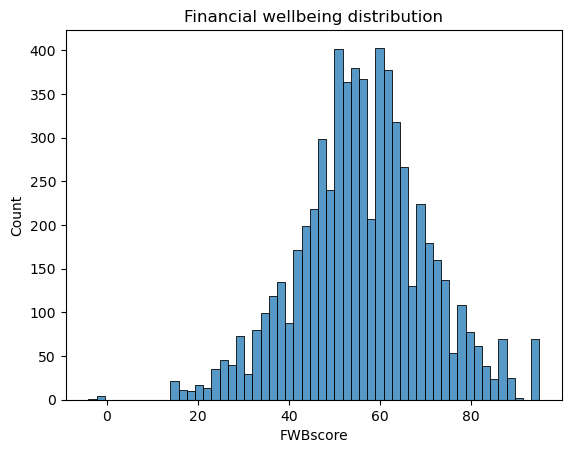

In [24]:
#lets explore the financial wellbeing score
sns.histplot(data=fw, x="FWBscore").set_title("Financial wellbeing distribution")

plt.show()

- Explanation

Financial well-being score has a normal distribution curve. Most of the scores are concentrated between 40 and 70, and a few outliers with a negative well-being score. 


The negative wellbeing score was an option for participants who did not want to diclose their financial wellbeing scores and invalid responses, thus were given negative scores. 

In [26]:
#checking for the values of the financial wellbeing scores
pd.DataFrame(fw["FWBscore"].value_counts())

,count
FWBscore,
49,240
59,217
58,207
50,204
51,198
...,...
-1,4
20,4
16,3


### Step 3: Check for missing values

In [28]:
#Check if there are any missing values in the columns
null_fw = fw.isnull().any()
null_fw

PUF_ID         False
sample         False
fpl            False
SWB_1          False
SWB_2          False
               ...  
PPT612         False
PPT1317        False
PPT18OV        False
PCTLT200FPL    False
finalwt        False
Length: 217, dtype: bool

In [29]:
fw.isnull().sum()

PUF_ID         0
sample         0
fpl            0
SWB_1          0
SWB_2          0
              ..
PPT612         0
PPT1317        0
PPT18OV        0
PCTLT200FPL    0
finalwt        0
Length: 217, dtype: int64

There are no missing values in any of the columns. 
This is attributed to the fact that the missing values(i.e participants who did not want to disclose their information), are given negative numeric values. 

Participants refusing to disclose their information could affect the viability of the model. Therefore, we delete all observations with the negative values.

#### Check for duplicates

In [32]:
# check for duplicates
duplicated_fw = fw.duplicated().any()
duplicated_fw

False

There are no duplicates in the dataset.

### Step 4: Data Cleaning

In [35]:
#remove all participants whose FWB score is less than 0
new_fw = fw[fw["FWBscore"] >= 0]
print(new_fw["FWBscore"].value_counts())

FWBscore
49    240
59    217
58    207
50    204
51    198
     ... 
19      5
18      5
20      4
16      3
90      2
Name: count, Length: 77, dtype: int64


The rows whose financial wellbeing score is less a negative have been filtered and removed

#### Explore the target variable in the dataset

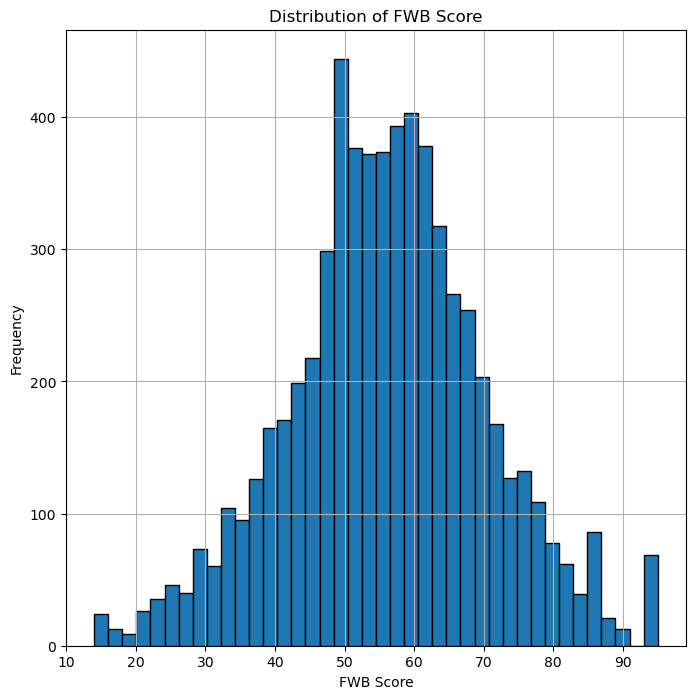

In [38]:
#plot the distribution of financial wellness score
plt.figure(figsize=(8,8))
plt.hist(new_fw['FWBscore'], bins=40, edgecolor='black')
plt.title('Distribution of FWB Score')
plt.xlabel('FWB Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [39]:
#check the correlation of the variables
fw_corr = new_fw.corr()
fw_corr

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
PUF_ID,1.000000,0.126501,-0.066905,0.008032,-0.003755,-0.018468,0.015825,-0.048817,-0.047813,-0.017795,...,0.002250,0.029597,0.033292,-0.015256,-0.014774,-0.018170,-0.029859,-0.033782,-0.060880,-0.031099
sample,0.126501,1.000000,-0.068147,0.053514,0.037604,-0.023922,0.041587,0.030833,0.025539,-0.024263,...,0.018682,0.039301,0.033802,-0.048756,-0.053370,-0.042004,-0.035641,-0.072269,-0.738099,-0.138292
fpl,-0.066905,-0.068147,1.000000,0.168371,0.084843,0.043915,0.338496,0.298640,0.280271,-0.267637,...,0.059025,-0.034594,-0.041647,-0.064091,-0.119581,-0.143307,-0.114820,-0.057871,0.076931,-0.162641
SWB_1,0.008032,0.053514,0.168371,1.000000,0.606271,0.432295,0.468909,0.409637,0.465207,-0.421763,...,-0.007569,0.030219,0.019939,0.011733,-0.004035,0.008007,-0.000749,-0.013731,0.003064,-0.099620
SWB_2,-0.003755,0.037604,0.084843,0.606271,1.000000,0.588403,0.328998,0.290127,0.373469,-0.333970,...,0.006511,0.043801,0.043108,0.038346,0.059749,0.053991,0.036380,0.026721,-0.052598,-0.011141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPT612,-0.018170,-0.042004,-0.143307,0.008007,0.053991,0.068221,-0.112691,-0.084141,-0.056046,0.058490,...,0.014961,0.038784,0.041821,0.088548,0.302996,1.000000,0.275439,0.081767,-0.052500,0.131592
PPT1317,-0.029859,-0.035641,-0.114820,-0.000749,0.036380,0.047266,-0.108341,-0.090625,-0.065832,0.065591,...,0.025612,0.022623,0.023194,-0.000442,0.041161,0.275439,1.000000,0.164683,-0.052740,0.129614
PPT18OV,-0.033782,-0.072269,-0.057871,-0.013731,0.026721,0.066364,-0.069037,-0.063833,-0.045160,0.044044,...,0.030741,0.032026,0.041031,0.036815,0.058924,0.081767,0.164683,1.000000,0.002540,0.161325
PCTLT200FPL,-0.060880,-0.738099,0.076931,0.003064,-0.052598,-0.031680,0.062543,0.018119,0.014576,-0.030264,...,-0.115689,0.025097,0.031510,0.004078,-0.026151,-0.052500,-0.052740,0.002540,1.000000,0.001301


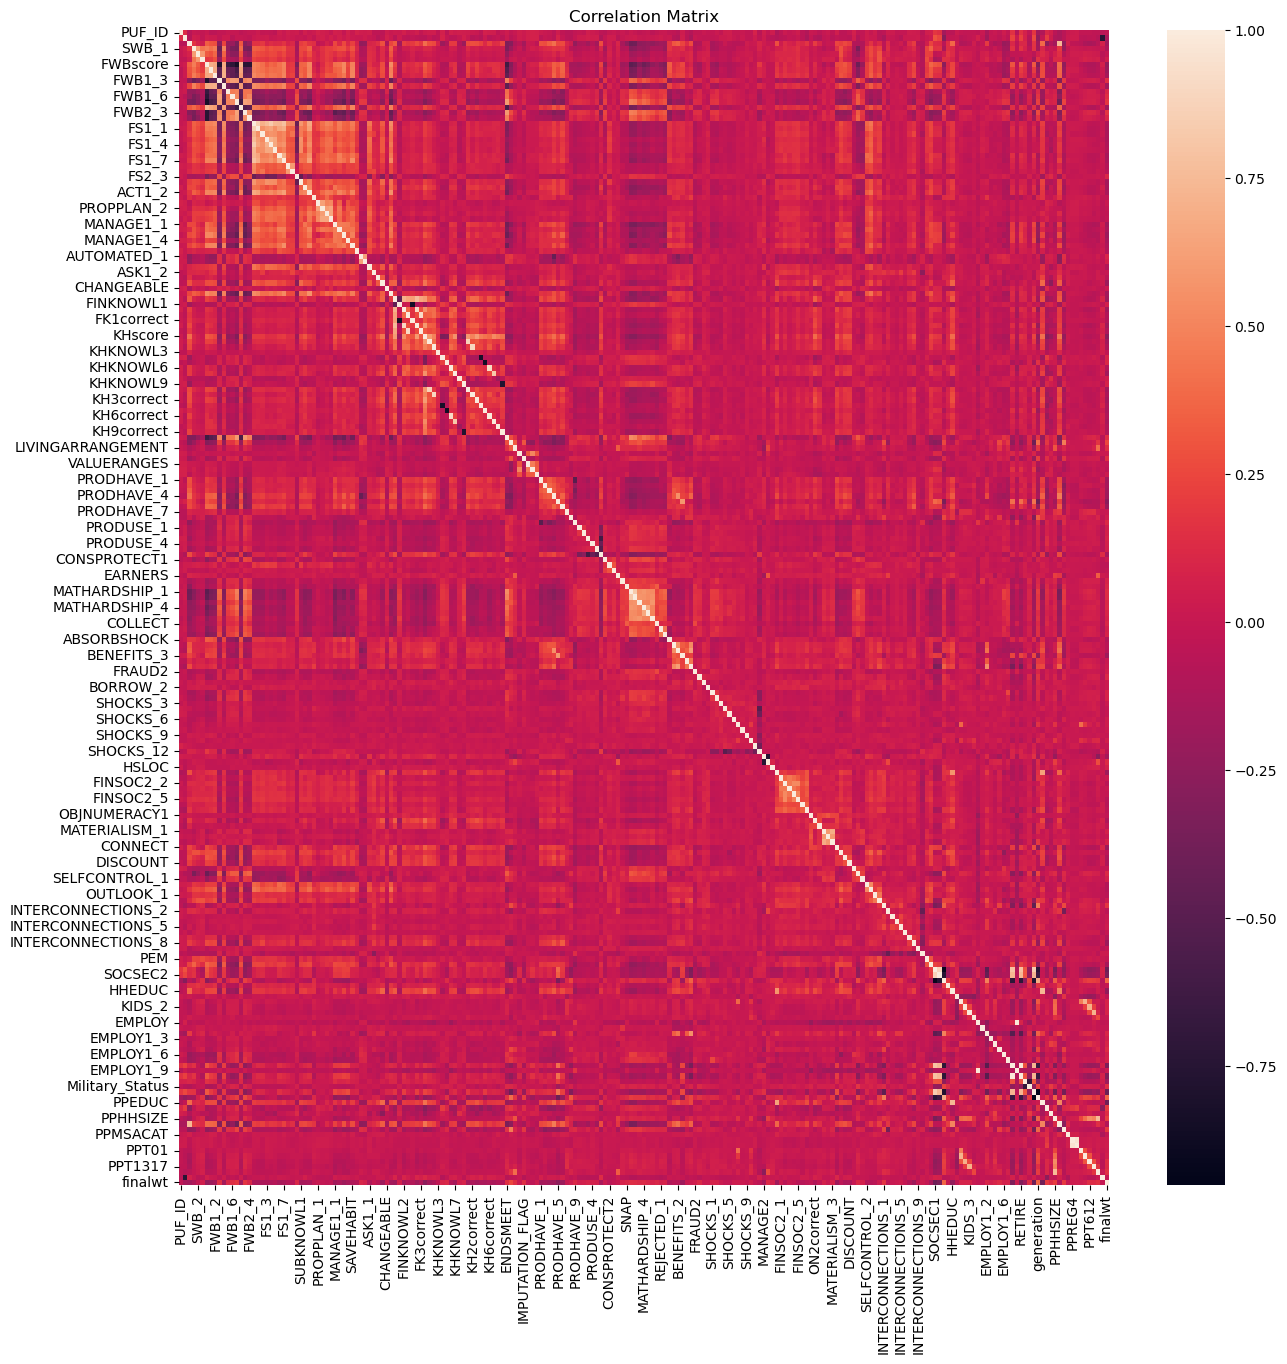

In [40]:
#plot the correlation matrix
plt.figure(figsize = (15,15))
sns.heatmap(fw_corr)
plt.title("Correlation Matrix")
plt.show()

In [41]:
#get the top 10 attributes that contribute most to financial wellbeing score
top_5_corr = fw_corr['FWBscore'].sort_values(ascending=False)
top_5_corr.head(11)

FWBscore     1.000000
FWB2_2       0.722593
FWB1_1       0.698984
FWB1_4       0.675470
FWB1_2       0.659061
GOALCONF     0.538213
MANAGE1_3    0.513126
ACT1_2       0.511093
FS1_7        0.494189
FSscore      0.489952
SAVEHABIT    0.489293
Name: FWBscore, dtype: float64

In [42]:
#sort the correlation values to find variables that have apositive and those with a negative correlation to financial wellness score
pd.DataFrame(fw.corr()["FWBscore"].sort_values())

,FWBscore
FWB2_1,-0.816481
FWB1_3,-0.767789
FWB2_4,-0.725068
FWB2_3,-0.724550
FWB1_6,-0.696643
...,...
FWB1_2,0.663491
FWB1_4,0.679914
FWB1_1,0.702372
FWB2_2,0.725874


### Explanation

It is clear that the financial wellbeing score questions have the highest correlation to the overall financial well-being.
Having money left at the end of the month has the highest positive correlation with financial wellness. 
financial literacy on how to navigate financial challenges comes in second with a positive correlation of 0.702372.
Followed by being able to make great financial decisions  with 0.679914, getting advice on any financial issues has a correlation of 0.663491

On the other hand, gift giving, not affording the things they want, living paycheck to paycheck, being behind with their finances, and spending less have a negative correlating to financial wellness, according to the statistics above. 

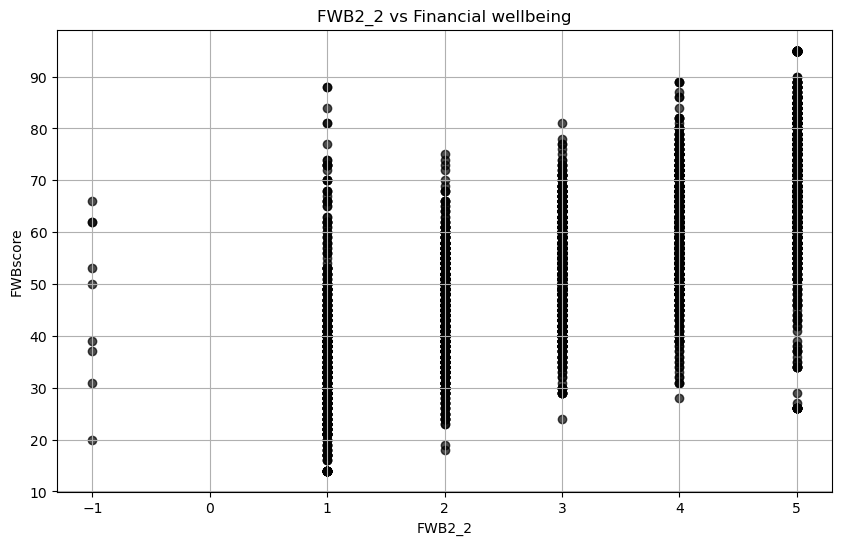

In [44]:
#Explore the distributions of the top 5 correlation variables
#scatterplot between SOCSEC3 and financial wellness
plt.figure(figsize=(10, 6))
plt.scatter(new_fw['FWB2_2'], new_fw['FWBscore'], alpha=0.7, color='black')
plt.title('FWB2_2 vs Financial wellbeing')
plt.xlabel('FWB2_2')
plt.ylabel('FWBscore')
plt.grid(True)
plt.show()

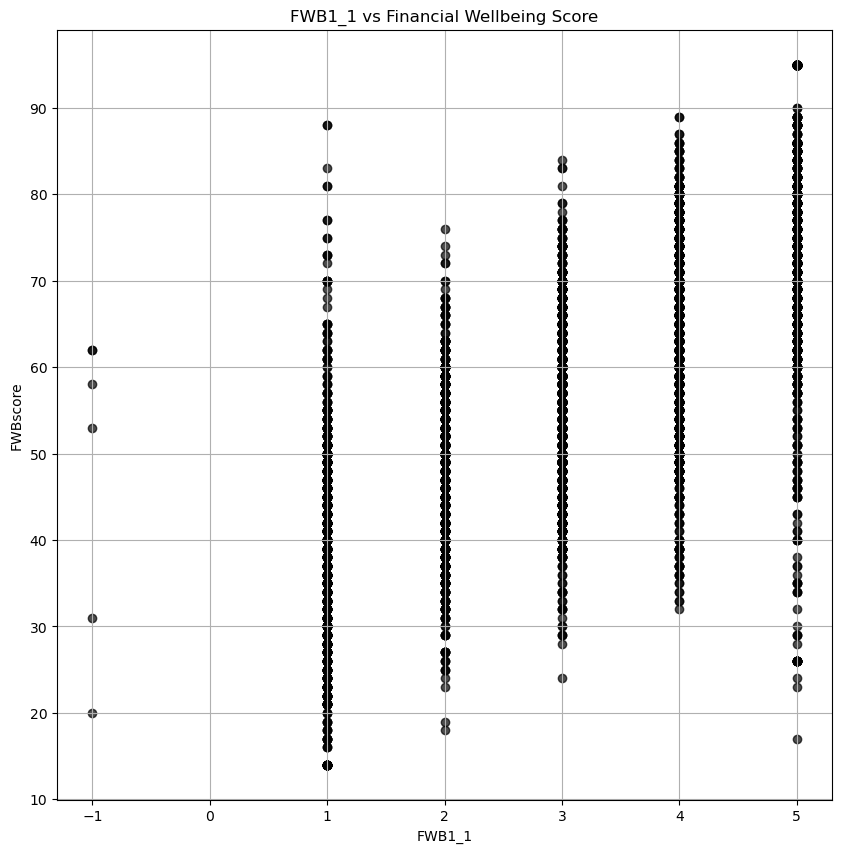

In [45]:
# Scatter plot of generation vs financial wellness score
plt.figure(figsize=(10, 10))
plt.scatter(new_fw['FWB1_1'], new_fw['FWBscore'], alpha=0.7, color='black')
plt.title('FWB1_1 vs Financial Wellbeing Score')
plt.xlabel('FWB1_1')
plt.ylabel('FWBscore')
plt.grid(True)
plt.show()

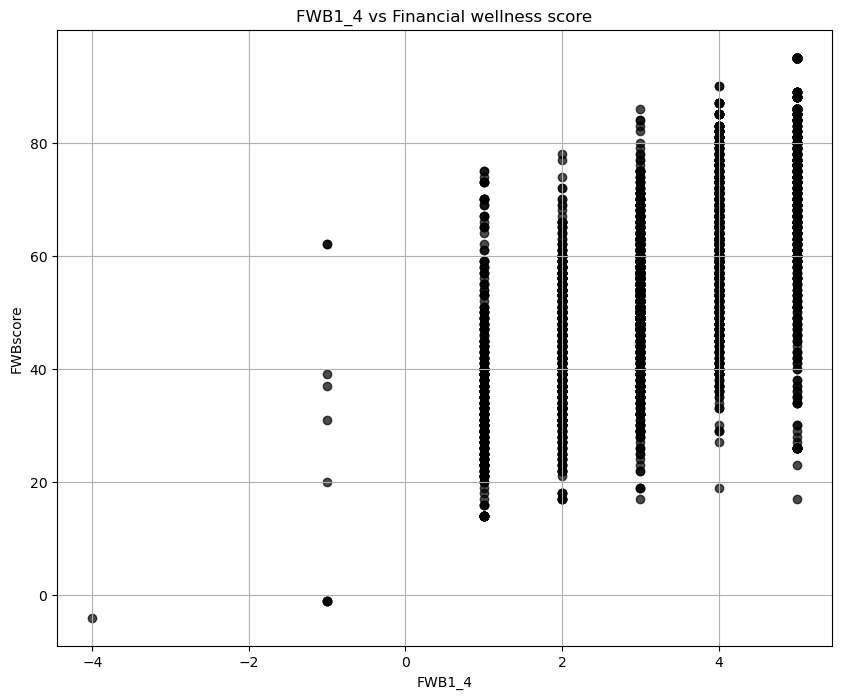

In [46]:
# Scatter plot of housing vs Financial wellness score
plt.figure(figsize=(10, 8))
plt.scatter(fw['FWB1_4'], fw['FWBscore'], alpha=0.7, color='black')
plt.title('FWB1_4 vs Financial wellness score')
plt.xlabel('FWB1_4')
plt.ylabel('FWBscore')
plt.grid(True)
plt.show()

In [47]:
pip install --upgrade seaborn pandas numpy

  Using cached numpy-2.1.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
Note: you may need to restart the kernel to use updated packages.


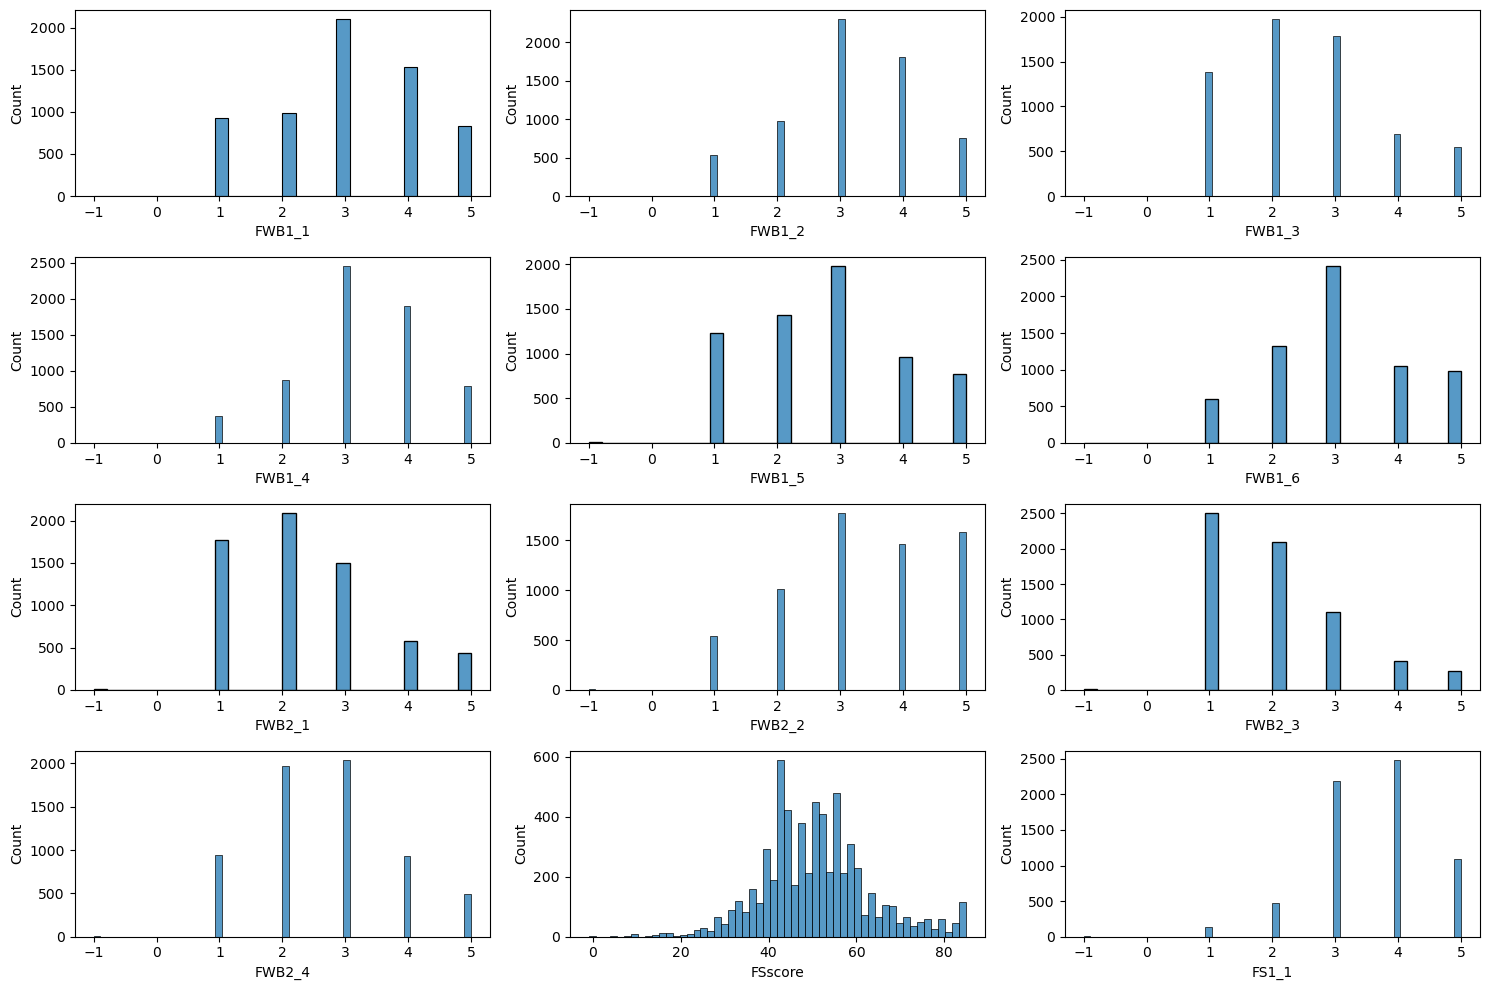

In [48]:
#plotting a histogram to explore each features distribution from column 7 to 19
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 10))
for i, column in enumerate(fw.columns[7:19]):
    sns.histplot(new_fw[column], ax = axes[i//3, i%3])
    plt.tight_layout()

### Step 5: Preparation of data for modelling

In [50]:
#select features to use in the model
selected_features = [
    "FWBscore",'FWB2_1', 'FWB1_5', 'FWB1_3', 'FWB2_4', 'FWB2_3', 'FWB1_6', 'FSscore',
    'MANAGE1_3', 'ACT1_2', 'SAVEHABIT', 'GOALCONF', 'fpl', 'agecat','PPINCIMP', 
    'PPEDUC', 'PPHHSIZE', 'PPGENDER'
]
new_fw = new_fw[selected_features]
new_fw.head()

,FWBscore,FWB2_1,FWB1_5,FWB1_3,FWB2_4,FWB2_3,FWB1_6,FSscore,MANAGE1_3,ACT1_2,SAVEHABIT,GOALCONF,fpl,agecat,PPINCIMP,PPEDUC,PPHHSIZE,PPGENDER
0,55,2,2,3,4,2,3,44,2,3,4,3,3,8,7,4,1,1
1,51,2,3,3,3,2,4,43,1,3,1,3,3,3,6,2,2,1
2,49,3,3,3,3,3,3,42,3,3,5,3,3,3,6,3,3,1
3,49,3,3,3,3,3,3,42,2,-1,4,-1,3,3,8,2,1,1
4,49,3,3,3,3,3,3,42,3,3,4,3,3,2,7,2,5,1


In [51]:
#standardize the data
scaler = StandardScaler()
scaler.fit_transform(new_fw)

array([[-0.07671903, -0.28893972, -0.61323442, ...,  0.71211975,
        -1.24513411, -0.95245167],
       [-0.36107456, -0.28893972,  0.17811171, ..., -0.98522518,
        -0.42779497, -0.95245167],
       [-0.50325233,  0.56333907,  0.17811171, ..., -0.13655271,
         0.38954417, -0.95245167],
       ...,
       [ 0.20763651, -0.28893972,  0.17811171, ...,  1.56079222,
        -0.42779497,  1.04992204],
       [-0.71651898,  0.56333907,  1.76080397, ..., -0.98522518,
        -0.42779497, -0.95245167],
       [-0.50325233,  0.56333907,  0.17811171, ...,  1.56079222,
         1.20688331, -0.95245167]])

Standardize the data into a scale between -1 and 1 in order to fit it into the model

### Step 7: Model Building

### 1. Random Forests

In [55]:
# Drop the variable
x = new_fw.drop(columns=['FWBscore'])
y = new_fw['FWBscore']

#Split dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Predict using the testing dataset
rf_predict = rf.predict(X_test)

# metrics
mse = mean_squared_error(Y_test, rf_predict)
mae = mean_absolute_error(Y_test, rf_predict)
r2 = r2_score(Y_test, rf_predict)

print("Mean Squared Error: {}".format(round(mse, 4)))
print(f"Random Forest Mean Absolute Error (MAE): {mae}")
print("R-squared error: {}".format(round(r2, 4)))

Mean Squared Error: 6.0149
Random Forest Mean Absolute Error (MAE): 1.4757824726134585
R-squared error: 0.969


Explanation

- An MAE of 1.4758 means that the predictions are off by 1.48, which is close to one, hence the model has a good accuracy level and the predictions are close to the actual values.

- MSE of 6.0149 is relatively low, thus the performance of the model is great.

- An R-squared of 0.969 indicates a 96.9% chance that the variability of the scores is explained by the features used in the model.

#### Feature importance 

In [98]:
# get important features
important_features = rf.feature_importances_

#Dataframe for feature importance prediction
importance_df = pd.DataFrame({
    'Feature': new_fw.drop(columns=['FWBscore']).columns,
    'Importance': important_features
}).sort_values(by='Importance', ascending=False)

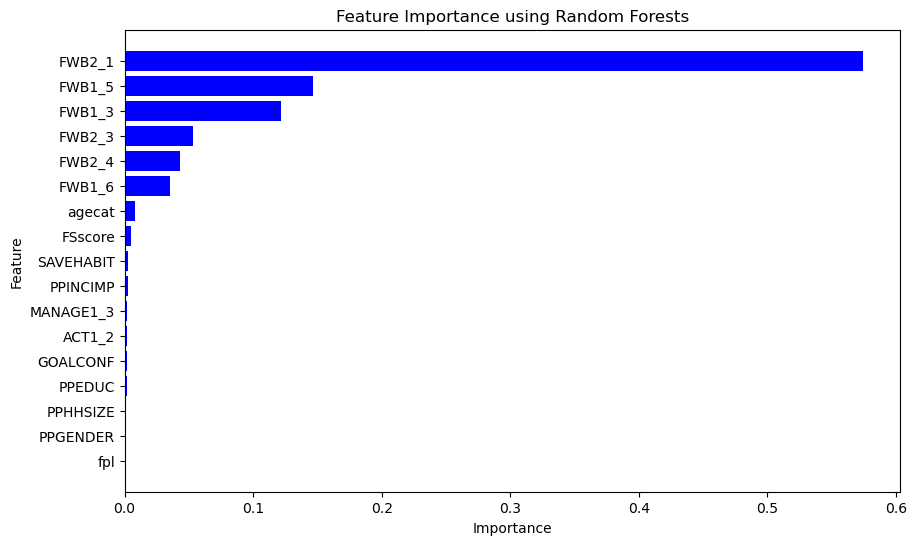

In [90]:
#plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forests')
plt.gca().invert_yaxis()
plt.show()

These are mostly the questions asked directly in the survey about their financial wellbeing. For instance:
FWB1_5: The participant is starting to get financially well.
FWB1_3: The participant cannot afford the things they want because of poor finances
FWB2_3: The participant is behind with their finances
FWB1_G: The participant iw worried about their savings

These variables can be divided into six categories: (1) individual characteristics, (2)
household and family characteristics, (3) income and employment characteristics, (4) savings and safety nets, (5) financial experiences, and (6) financial behaviours, skills and attitudes.

Therefore, according to the analysis above, age plays a role in the financial wellness of an individual, followed closely by financial skills, then savings habit, household income, and paying of credit card loans as the list continues.

### 2. Linear Regression

In [83]:
# Train The Linear Regression model
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_predictions = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(Y_test, lr_predictions))

print("Linear Regression RMSE:", lr_rmse)

# Other valuation metrics
mse = mean_squared_error(Y_test, lr_predictions)
mae = mean_absolute_error(Y_test, lr_predictions)
r2 = r2_score(Y_test, lr_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Linear Regression RMSE: 3.662180581474289
Mean Squared Error (MSE): 13.41156661132736
Root Mean Squared Error (RMSE): 3.662180581474289
Mean Absolute Error (MAE): 2.260486095573576
R-squared (R2): 0.9309735366321373


Explanation
- The average of error of prediction of the model is 3.66, which is moderately accurate

- The MSE indicates a larger spread in the errors in predicted values.
- R-squared of 0.93097 indicates a 93.097% accuracy in prediction. 

### 3. Logistic Regression

In [90]:
#prepare data for logistic regression
#divide FWBScore into 2 at the 30% mark by identifying the population at a risk of getting poor financial wellness
new_fw["FWBscore"] = pd.qcut(new_fw["FWBscore"], [0, 0.3, 1], labels = ["Risk", "No risk"])


In [109]:
# features  (x) and target (y) variable
x = new_fw.drop(columns=['FWBscore'])
y = new_fw['FWBscore']

# Check x and y variables
print("\nContents of x:")
print(x)
print("\nContents of y:")
print(y)

# check the shape of x and y
print(f"\nShape of x: {x.shape}")
print(f"Shape of y: {y.shape}")

# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f"\nShape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Contents of x:
      FWB2_1  FWB1_5  FWB1_3  FWB2_4  FWB2_3  FWB1_6  FSscore  MANAGE1_3  \
0          2       2       3       4       2       3       44          2   
1          2       3       3       3       2       4       43          1   
2          3       3       3       3       3       3       42          3   
3          3       3       3       3       3       3       42          2   
4          3       3       3       3       3       3       42          3   
...      ...     ...     ...     ...     ...     ...      ...        ...   
6389       2       3       1       2       2       2       47          3   
6390       2       5       2       2       2       2       59          3   
6391       2       3       3       2       1       2       51          5   
6392       3       5       3       5       1       3       54          3   
6393       3       3       3       3       3       3       42          2   

      ACT1_2  SAVEHABIT  GOALCONF  fpl  agecat  PPINCIMP  PPEDUC  PPHHS

To use the logistic regression model, we have to group the target variable into different classifications. In this case, there are 2 categories, individuals who are at risk of poor financial well-being and those without risk. 

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#train the dataset
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [114]:
yhat= LR.predict(x_test)
yhat

array(['Risk', 'Risk', 'No risk', ..., 'Risk', 'No risk', 'No risk'],
      dtype=object)

#### Evaluation

In [117]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=['Risk', 'No risk']))

[[ 524   74]
 [  59 1260]]


Confusion matrix, without normalization
[[ 524   74]
 [  59 1260]]


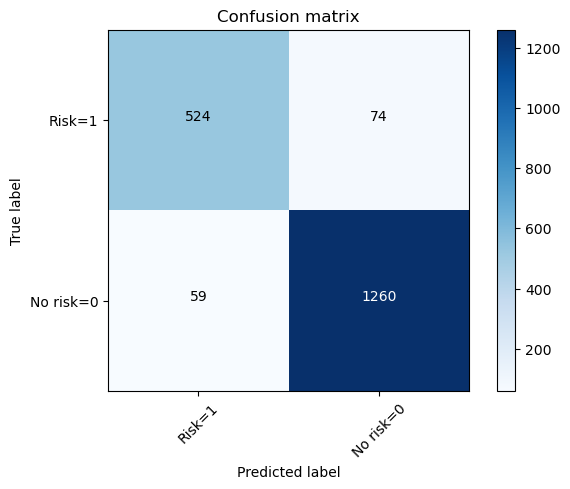

In [119]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['Risk', 'No risk'])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Risk=1','No risk=0'],normalize= False,  title='Confusion matrix')

The model predicted correctly that 451 individuals in the testing data are at risk of financial stress, and 1224 are at no risk.

In [122]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

     No risk       0.94      0.96      0.95      1319
        Risk       0.90      0.88      0.89       598

    accuracy                           0.93      1917
   macro avg       0.92      0.92      0.92      1917
weighted avg       0.93      0.93      0.93      1917



In [124]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print("Accuracy: {}".format(round(accuracy_score(y_test, yhat), 4)))
print("Precision: {}".format(round(precision_score(y_test, yhat, pos_label='Risk'), 4)))
print("Recall: {}".format(round(recall_score(y_test, yhat, pos_label='Risk'), 4)))
print("F1_score: {}".format(round(f1_score(y_test, yhat, pos_label='Risk'), 4)))

Accuracy: 0.9306
Precision: 0.8988
Recall: 0.8763
F1_score: 0.8874


The model has an accuracy score of 93.06%, meaning that about 93% of the predicted values were predicted correctly. 
Precision- about 89.88% of the true values have been predicted correctly by the model. There are few false positive predictions.
    
    

#### Log loss evaluation

In [130]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[5.25e-03, 9.95e-01],
       [8.12e-05, 1.00e+00],
       [9.99e-01, 7.77e-04],
       ...,
       [1.79e-02, 9.82e-01],
       [9.93e-01, 7.31e-03],
       [8.45e-01, 1.55e-01]])

In [132]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.165413857408967

In [134]:
y_test

1196       Risk
3743       Risk
3871    No risk
4965       Risk
4914    No risk
         ...   
1225    No risk
5965       Risk
6082       Risk
1072    No risk
718     No risk
Name: FWBscore, Length: 1917, dtype: category
Categories (2, object): ['Risk' < 'No risk']

In [136]:
y_test.value_counts()

FWBscore
No risk    1319
Risk        598
Name: count, dtype: int64

In the testing data, the model predicts that 598 individuals have a higher chance of not being at risk of poor financial wellness

### Insights and foresights
#### Insights
From the random forests model, there is a high negative correlation between debt and financial wellness. 

Income and saving habits also play a crucial role, thus contributing positively to the financial well-being of an individual. 

Participants with low-income levels are the most vulnerable groups, who might end up in debt and getting student loans, thus affecting their financial wellness. With policies and measures to improve financial wellness, these are the groups that should be targeted. 

### What can be done?
1. Improve financial literacy by having education programs aimed at improving their financial knowledge. This includes knowledge on interest rates, savings, importance of insiurance, among others.
2. Debt management programs- since debt is identified as one of the significant factors affecting financial well-being, it is vital to have programs aimed at teaching the vulnerable population on how to get out of it.
3. Promoting saving habits - savings give one a sense of security as they have something for a rainy day. It is therefore great to teach the vulnerable group to improve their saving habits thus cushioning themselves in the future.
4. Identify the high-risk group - in the model, the group with a high risk of not having financial wellness are identified and have specific issues tailored for them. For instance, offering one on one advise on the issues they face and how they can make changes to overcome them. 

## Conclusion

From the hypothesis, this machine learning approach identifies that some individuals from the survey are at risk of getting financial stress. Significant decision-making is vital to help the affected population overcome this stress. This can be achieved by addressing the key areas of financial wellness with the affected population. For instance, financial knowledge on the importance of saving to cushion any future financial emergencies. The population should be taught on having insurance and other financial institutions that make improve their wellness such as saccos. The population should be taught about interest rates and how the debt service works. This includes loans that are available to them without crippling their financial capabilities (Money & Pensions Service, n.d). With this, people of the younger generation should be educated on the importance of financial planning for their lives, both the present and future lives. Planning entails giving the necessary resources and addressing policy gaps in financial knowledge. Educating the population will see a significant decline in financial stress and overall mental health challenges related to financial stress over the years. Financially well people spend sustainably and have high productivity, thus having healthier businesses with more profits and less bad debt write-offs. With healthy and productive businesses, teh economy is able to grow and become sustainable for a lot of people. 

###                                           References

AMERICAN PSYCHOLOGICAL ASSOCIATION. (2015). STRESS IN AMERICA: Paying With Our Health. https://www.apa.org/news/press/releases/stress/2014/stress-report.pdf 

Consumer Financial Protection Bureau. (2017, September). National Financial WellBeing Survey. https://www.consumerfinance.gov/data-research/financial-well-being-survey-data/

Data.gov. (2022, April 21). Consumer Financial Protection Bureau - Financial Well-Being in America (2017). https://catalog.data.gov/dataset/financial-well-being-in-america-2017 

Human Resources University of Michigan. (2024, July 18). Financial well-being. https://hr.umich.edu/benefits-wellness/health-well-being/mhealthy/faculty-staff-well-being/financial-well-being 

Hassan, N. M. F. B., Hassan, N. M., Kassim, N. E. S., & Said, N. Y. B. U. (2021). The Relationship between Financial Wellbeing and Mental Health: A Systematic Literature. Reviews. Asia Proceedings of Social Sciences, 7(2), 92–95. https://doi.org/10.31580/apss.v7i2.1780 

KIPPRA. (2023, July 5). Building Kenya’s Financial Health amidst Increasing Financial Inclusion –https://kippra.or.ke/building-kenyas-financial-health-amidst-increasing-financial-inclusion/

Money & Pensions Service. (n.d.).  What is financial wellbeing? Retrieved July 23, 2024, from https://maps.org.uk/en/our-work/uk-strategy-for-financial-wellbeing/what-is-financial-wellbeing?__cf_chl_rt_tk=JIymRUb9Uqs3E_Lw3bB36_wrG8fM3JNSVdbUeH8lYHo-1721676874-0.0.1.1-4287#How-to-improve-financial-wellbeing  
